In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


# make dataset to train

In [4]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [5]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [6]:
# hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [7]:
# load data
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)
print(train_set.shape)
print(test_set.shape)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

(512, 5)
(227, 5)
[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.7

 [0.18613311 0.18770263 0.18594069 0.17523528 0.17606266]] -> [0.15131322]
[[0.26169032 0.25956622 0.25481816 0.19219324 0.23318369]
 [0.21714956 0.21410709 0.22585661 0.14024379 0.2204569 ]
 [0.20131351 0.20178951 0.21683515 0.16935556 0.19641161]
 [0.19655237 0.19563072 0.21697844 0.11469033 0.20940235]
 [0.19096308 0.19985007 0.21178752 0.14162409 0.19521447]
 [0.18613311 0.18770263 0.18594069 0.17523528 0.17606266]
 [0.15939468 0.15268954 0.16570327 0.1531236  0.15131322]] -> [0.15566113]
[[0.21714956 0.21410709 0.22585661 0.14024379 0.2204569 ]
 [0.20131351 0.20178951 0.21683515 0.16935556 0.19641161]
 [0.19655237 0.19563072 0.21697844 0.11469033 0.20940235]
 [0.19096308 0.19985007 0.21178752 0.14162409 0.19521447]
 [0.18613311 0.18770263 0.18594069 0.17523528 0.17606266]
 [0.15939468 0.15268954 0.16570327 0.1531236  0.15131322]
 [0.12962046 0.14438723 0.1503921  0.11799767 0.15566113]] -> [0.15655877]
[[0.20131351 0.20178951 0.21683515 0.16935556 0.19641161]
 [0.19655237 0.195630

 [0.85461328 0.84977455 0.88991824 0.1276508  0.86431866]] -> [0.85460195]
[[0.79944642 0.82170299 0.84824821 0.14488662 0.85738331]
 [0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]
 [0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]
 [0.83439582 0.83881823 0.88048867 0.1638971  0.87850652]
 [0.83770798 0.84732476 0.89460789 0.11309492 0.8737889 ]
 [0.85461328 0.84977455 0.88991824 0.1276508  0.86431866]
 [0.81890497 0.82264564 0.87148169 0.14224254 0.85460195]] -> [0.84837074]
[[0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]
 [0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]
 [0.83439582 0.83881823 0.88048867 0.1638971  0.87850652]
 [0.83770798 0.84732476 0.89460789 0.11309492 0.8737889 ]
 [0.85461328 0.84977455 0.88991824 0.1276508  0.86431866]
 [0.81890497 0.82264564 0.87148169 0.14224254 0.85460195]
 [0.83539627 0.82687502 0.87685153 0.11592722 0.84837074]] -> [0.88794153]
[[0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]
 [0.83439582 0.838818

In [8]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [9]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [10]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038293838501
1 0.18340936303138733
2 0.15106438100337982
3 0.12612313032150269
4 0.10598734766244888
5 0.08915018290281296
6 0.07493707537651062
7 0.06327901780605316
8 0.05449603125452995
9 0.04902385547757149
10 0.04693441092967987
11 0.04731706902384758
12 0.04838263988494873
13 0.04839477688074112
14 0.04633766785264015
15 0.04207771271467209
16 0.03620170056819916
17 0.029662013053894043
18 0.02338656596839428
19 0.018011242151260376
20 0.013800663873553276
21 0.010714655742049217
22 0.008532220497727394
23 0.0069765085354447365
24 0.005824481602758169
25 0.004987423308193684
26 0.004524713382124901
27 0.004554683342576027
28 0.005089898128062487
29 0.005920967552810907
30 0.0066848937422037125
31 0.00707267364487052
32 0.006973991170525551
33 0.006471904926002026
34 0.005753521341830492
35 0.005014693830162287
36 0.004395292140543461
37 0.003953744191676378
38 0.003676638938486576
39 0.0035109843593090773
40 0.003401308786123991
41 0.003315108362585306
42 0.00324889458715

327 0.0014452505856752396
328 0.0014436454512178898
329 0.0014420473016798496
330 0.00144045555498451
331 0.0014388711424544454
332 0.0014372928999364376
333 0.0014357215259224176
334 0.0014341564383357763
335 0.0014325979864224792
336 0.0014310460537672043
337 0.0014295007567852736
338 0.0014279616298153996
339 0.001426428440026939
340 0.0014249020023271441
341 0.0014233817346394062
342 0.001421867753379047
343 0.001420359592884779
344 0.0014188579516485333
345 0.001417362131178379
346 0.0014158725971356034
347 0.0014143887674435973
348 0.001412911107763648
349 0.0014114395016804338
350 0.0014099740656092763
351 0.0014085142174735665
352 0.0014070601901039481
353 0.0014056124491617084
354 0.0014041704125702381
355 0.001402734313160181
356 0.001401304267346859
357 0.0013998799258843064
358 0.0013984614051878452
359 0.001397048938088119
360 0.001395642408169806
361 0.0013942418154329062
362 0.0013928473927080631
363 0.0013914587907493114
364 0.0013900762423872948
365 0.00138869986403733

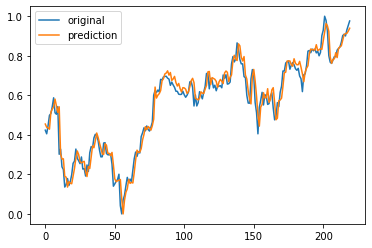

In [11]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()